In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [101]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [102]:
from konlpy.tag import Mecab
mecab = Mecab()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = mecab.pos(line)
        res = []
        for w in words:
            if w[1] in ["NNG"]:      
                res.append(w[0])   
        tokenized.append(res)

print("슝~")

슝~


In [103]:
print(len(tokenized))

71156


In [104]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])


[('작품', 0.8848797678947449),
 ('드라마', 0.8759722113609314),
 ('옴니버스', 0.8622318506240845),
 ('형식', 0.853972315788269),
 ('다큐멘터리', 0.8452109098434448),
 ('코미디', 0.844467282295227),
 ('소재', 0.8431102633476257),
 ('주제', 0.8372148275375366),
 ('흥미', 0.8342329263687134),
 ('모티브', 0.8315317034721375)]

In [105]:
model.wv.most_similar(positive=['사랑'])

[('만남', 0.7838736176490784),
 ('운명', 0.7805668711662292),
 ('질투', 0.7787315249443054),
 ('진심', 0.7758973836898804),
 ('아드', 0.7758262157440186),
 ('연인', 0.760838508605957),
 ('실연', 0.7557802796363831),
 ('아픔', 0.7541966438293457),
 ('이별', 0.7515729069709778),
 ('결실', 0.7495714426040649)]

In [106]:
model.wv.most_similar(positive=['연극'])

[('개성', 0.9032423496246338),
 ('미술', 0.902372419834137),
 ('대본', 0.8989673852920532),
 ('출연', 0.8981977701187134),
 ('뮤지컬', 0.8928874731063843),
 ('데뷔', 0.8894146680831909),
 ('오페라', 0.8890541195869446),
 ('아역', 0.8875545263290405),
 ('무용', 0.8857111930847168),
 ('스타일', 0.883632242679596)]

### 명사추출 (일반명사:"NNG"만을 추출)

In [107]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = mecab.pos(line) 
            for word in tokenlist:
                if word[1] in ["NNG"]:
                    result.append((word[0])) 
    return ' '.join(result)


In [108]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


### TF-IDF

In [109]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 26903)


In [110]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

15930
특종


In [111]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
자신, 시작, 사랑, 사람, 친구, 영화, 남자, 여자, 가족, 이야기, 마을, 마음, 사건, 세상, 아버지, 아이, 엄마, 시간, 세계, 아들, 소녀, 아내, 사이, 영화제, 감독, 서로, 남편, 비밀, 여행, 인생, 학교, 발견, 순간, 사실, 음악, 생활, 아빠, 마지막, 행복, 기억, 모습, 죽음, 소년, 이상, 도시, 단편, 사고, 결혼, 한편, 위기, 생각, 관계, 성공, 전쟁, 일상, 경찰, 최고, 과거, 인간, 현실, 상황, 결심, 운명, 여인, 하루, 이름, 이후, 준비, 위험, 동안, 감정, 충격, 살인, 부모, 존재, 연인, 어머니, 희망, 특별, 결국, 청년, 국제, 시절, 동생, 작가, 작품, 여성, 상처, 모두, 사회, 목숨, 할머니, 진실, 매력, 계획, 제안, 만남, 이유, 자리, 배우, 

일반영화를 대표하는 단어들:
자신, 영화제, 사람, 시작, 영화, 친구, 국제, 남자, 사랑, 이야기, 여자, 사건, 남편, 가족, 아이, 아버지, 세계, 시간, 단편, 마을, 엄마, 마음, 아들, 모습, 관계, 감독, 생각, 작품, 사이, 세상, 발견, 아내, 여성, 소녀, 사실, 애니메이션, 이상, 인간, 생활, 죽음, 결혼, 비밀, 상황, 학교, 기억, 도시, 여행, 소년, 한편, 순간, 서로, 과거, 경찰, 동안, 마지막, 현실, 전쟁, 존재, 일상, 주인공, 사회, 사고, 어머니, 연출, 인생, 섹스, 다큐멘터리, 부문, 살인, 위험, 행복, 최고, 의도, 위기, 동생, 조직, 부부, 회사, 계획, 이후, 시절, 성공, 아빠, 결국, 문제, 하루, 음악, 부모, 운명, 감정, 경쟁, 사진, 결심, 할머니, 준비, 거대, 동료, 정체, 소리, 과정, 

In [112]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [113]:
print(target_art)

['여인', '이름', '충격', '연인', '희망', '특별', '청년', '작가', '상처', '모두', '목숨', '진실', '매력', '제안', '만남']


In [114]:
print(target_gen)

['애니메이션', '주인공', '연출', '섹스', '다큐멘터리', '부문', '의도', '조직', '부부', '회사', '문제', '경쟁', '사진', '거대', '동료']


### attribute 단어 셋 리스트

In [126]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']


In [127]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [128]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 27479)


### 주제별 단어 출력

In [129]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 자신, 지구, 시작, 사람, 인류, 인간, 세계, 우주, 미래, 로봇, 박사, 친구, 거대, 외계, 우주선, 
가족: 엄마, 아빠, 영화제, 가족, 자신, 친구, 아버지, 시작, 아들, 사랑, 마을, 국제, 아이, 낙타, 할머니, 
공연: 사랑, 오페라, 실황, 백작, 자신, 카바, 토스카, 공연, 리골레토, 왕자, 콘서트, 만리, 오텔로, 로지, 음악, 
공포(호러): 친구, 시작, 사람, 자신, 공포, 사건, 발견, 죽음, 남자, 이상, 마을, 영화, 여자, 가족, 악령, 
기타: 영화제, 국제, 단편, 영화, 자신, 사람, 이야기, 남자, 여자, 친구, 사랑, 시작, 페스티벌, 미디어, 엄마, 
다큐멘터리: 영화제, 영화, 다큐, 다큐멘터리, 국제, 사람, 이야기, 감독, 자신, 세계, 여성, 시작, 가족, 환경, 작품, 
드라마: 자신, 영화제, 사랑, 영화, 사람, 시작, 남자, 친구, 국제, 여자, 이야기, 엄마, 단편, 가족, 아버지, 
멜로로맨스: 사랑, 남자, 자신, 친구, 여자, 시작, 남편, 사람, 섹스, 마음, 결혼, 아내, 관계, 부부, 영화, 
뮤지컬: 뮤지컬, 사랑, 지모도, 영화, 음악, 카바, 자신, 영화제, 시작, 시앙치, 토스카, 팬텀, 크리스틴, 최고, 노트르담, 
미스터리: 사건, 시작, 자신, 사람, 친구, 사고, 발견, 진실, 죽음, 기억, 남자, 아내, 살인, 아이, 여자, 
범죄: 사건, 자신, 경찰, 시작, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 수사, 여자, 발견, 범인, 
사극: 시작, 사랑, 신기전, 자신, 춘향, 아가멤논, 채선, 루안, 황제, 최고, 운명, 사람, 정조, 중서, 권력, 
서부극(웨스턴): 보안관, 서부, 카우보이, 마을, 자신, 사냥, 시작, 서부극, 무법자, 프린트, 분노, 마적, 현상금, 장고, 가족, 
성인물(에로): 남편, 성애, 자신, 관계, 남자, 섹스, 정사, 영화, 여자, 시작, 친구, 유부녀, 마음, 사랑, 마사지, 
스릴러: 자신, 사건, 시작, 사람, 

### WEAT-Score 함수

In [121]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

# 코사인 유사도
def cos_sim(i, j):
    return dot(i, j.T) / (norm(i) * norm(j))

# 단일 단어 벡터 w에 대한 s(w, A, B)
def s_single(w, A, B):
    cos_a = np.array([cos_sim(w, a) for a in A])
    cos_b = np.array([cos_sim(w, b) for b in B])
    return np.mean(cos_a) - np.mean(cos_b)

# 여러 벡터에 대해 s(w, A, B) 계산
def s(w_array, A, B):
    return np.array([s_single(w, A, B) for w in w_array])

# WEAT score 계산
def weat_score(X, Y, A, B):
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return (mean_X - mean_Y) / std_dev


In [122]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [123]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)


In [124]:
# 절대값 0.8이상만 출력
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if np.abs(matrix[i][j]) >= 0.8:
            
            print(genre_name[i], genre_name[j],matrix[i][j])
            

가족 다큐멘터리 0.98677963
가족 뮤지컬 0.8193801
공연 뮤지컬 1.2399257
공포(호러) 다큐멘터리 0.8933863
공포(호러) 전쟁 0.8075082
기타 드라마 -0.8755865
기타 코미디 -0.86343133
다큐멘터리 드라마 -0.905962
다큐멘터리 애니메이션 -1.0316458
다큐멘터리 어드벤처 -0.9688436
다큐멘터리 코미디 -0.91798276
다큐멘터리 판타지 -1.0775721
드라마 뮤지컬 0.80970615
뮤지컬 판타지 -0.8457344
서부극(웨스턴) 전쟁 0.8548001


0.8 이상의 결과만 출력한 결과


| 장르 조합       | 점수          |
| ----------- | ----------- |
| 공연 뮤지컬      | 0.87200385  |
| 기타 드라마      | -0.86304724 |
| 기타 코미디      | -0.8874506  |
| 다큐멘터리 드라마   | -0.8755984  |
| 다큐멘터리 애니메이션 | -0.86024237 |
| 다큐멘터리 코미디   | -0.91230744 |
| 다큐멘터리 판타지   | -0.99530256 |
| 드라마 뮤지컬     | 0.81357825  |
| 드라마 코미디     | -0.8339202  |
| 뮤지컬 어드벤처    | -0.83275163 |
| 뮤지컬 코미디     | -0.91864824 |
| 범죄 스릴러      | -0.8363078  |




| 장르 조합       | 점수          |
| ----------- | ----------- |
| 공연 뮤지컬      | 0.87200385  |

공연은 예술영화에 가깝고 뮤지컬은 일반영화에 가까운 것을 확인할 수 있었다.

| 장르 조합       | 점수          |
| ----------- | ----------- |
| 다큐멘터리 판타지   | -0.99530256 |

다큐멘터리는 일반영화에 가깝고 판타지는 예술영화에 가까운 것을 확인할 수 있다.


### 결과 히트맵

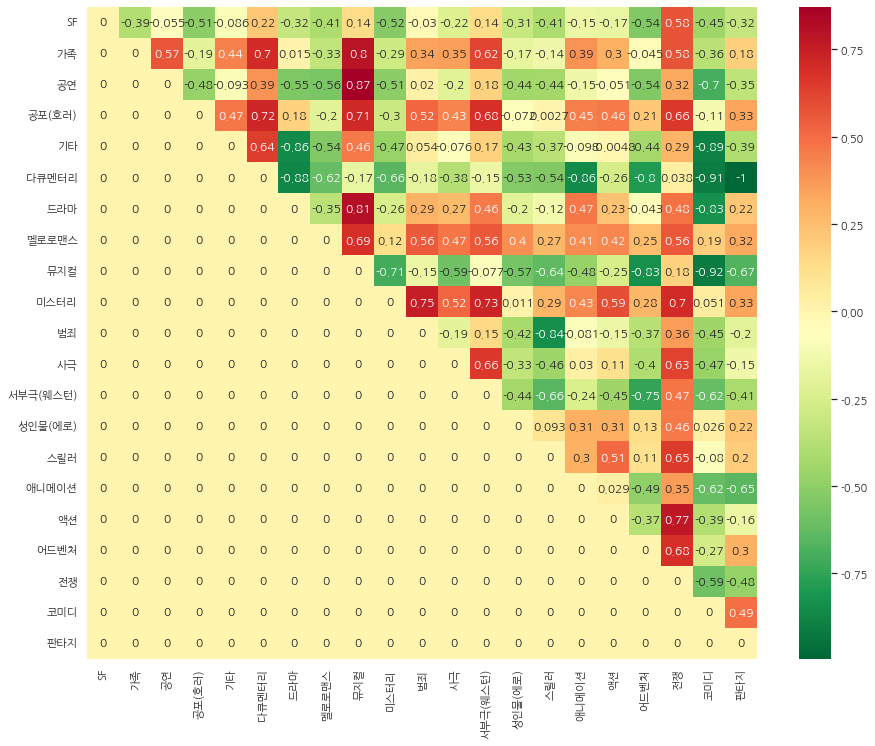

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 12))  #

ax = sns.heatmap(
    matrix,
    xticklabels=genre_name,
    yticklabels=genre_name,
    annot=True,
    cmap='RdYlGn_r'
)
plt.show()


### 추가실험 (모든 명사 추출해보기)

In [87]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = mecab.pos(line) 
            for word in tokenlist:
                if word[1] in ["NNG","NNP","NNB"]:
                    result.append((word[0])) 
    return ' '.join(result)

art = read_token(art_txt)
gen = read_token(gen_txt)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.
예술영화를 대표하는 단어들:
자신, 시작, 사랑, 사람, 친구, 영화, 남자, 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


여자, 가족, 이야기, 마을, 마음, 사건, 세상, 아버지, 아이, 엄마, 시간, 세계, 아들, 소녀, 아내, 사이, 영화제, 감독, 서로, 남편, 비밀, 여행, 인생, 학교, 발견, 순간, 사실, 음악, 생활, 아빠, 마지막, 행복, 기억, 모습, 죽음, 소년, 이상, 도시, 단편, 사고, 결혼, 한편, 때문, 위기, 생각, 관계, 성공, 전쟁, 일상, 경찰, 최고, 과거, 인간, 현실, 미국, 상황, 결심, 운명, 여인, 하루, 이름, 이후, 준비, 위험, 동안, 감정, 충격, 살인, 부모, 한국, 존재, 연인, 어머니, 희망, 특별, 결국, 청년, 국제, 시절, 동생, 작가, 작품, 여성, 상처, 모두, 사회, 목숨, 할머니, 진실, 매력, 계획, 일본, 프랑스, 

일반영화를 대표하는 단어들:
자신, 영화제, 사람, 시작, 영화, 친구, 국제, 남자, 사랑, 이야기, 여자, 서울, 사건, 남편, 가족, 아이, 아버지, 세계, 시간, 단편, 마을, 엄마, 마음, 아들, 모습, 관계, 감독, 생각, 작품, 사이, 세상, 발견, 아내, 여성, 소녀, 사실, 애니메이션, 때문, 이상, 인간, 생활, 죽음, 결혼, 비밀, 상황, 학교, 기억, 도시, 여행, 소년, 한편, 순간, 서로, 과거, 경찰, 동안, 미국, 마지막, 현실, 전쟁, 존재, 일상, 주인공, 사회, 사고, 어머니, 연출, 인생, 섹스, 다큐멘터리, 부문, 한국, 살인, 위험, 행복, 최고, 의도, 위기, 동생, 조직, 부부, 회사, 계획, 이후, 일본, 시절, 성공, 아빠, 결국, 문제, 부산, 하루, 음악, 부모, 운명, 감정, 경쟁, 사진, 결심, 할머니, 

### NNG만 추출했을 경우

예술영화를 대표하는 단어들:
자신, 시작, 사랑, 사람, 친구, 영화, 남자, 여자, 가족, 이야기, 마을, 마음, 사건, 세상, 아버지, 아이, 엄마, 시간, 세계, 아들, 소녀, 아내, 사이, 영화제, 감독, 서로, 남편, 비밀, 여행, 인생, 학교, 발견, 순간, 사실, 음악, 생활, 아빠, 마지막, 행복, 기억, 모습, 죽음, 소년, 이상, 도시, 단편, 사고, 결혼, 한편, 위기, 생각, 관계, 성공, 전쟁, 일상, 경찰, 최고, 과거, 인간, 현실, 상황, 결심, 운명, 여인, 하루, 이름, 이후, 준비, 위험, 동안, 감정, 충격, 살인, 부모, 존재, 연인, 어머니, 희망, 특별, 결국, 청년, 국제, 시절, 동생, 작가, 작품, 여성, 상처, 모두, 사회, 목숨, 할머니, 진실, 매력, 계획, 제안, 만남, 이유, 자리, 배우, 

일반영화를 대표하는 단어들:
자신, 영화제, 사람, 시작, 영화, 친구, 국제, 남자, 사랑, 이야기, 여자, 사건, 남편, 가족, 아이, 아버지, 세계, 시간, 단편, 마을, 엄마, 마음, 아들, 모습, 관계, 감독, 생각, 작품, 사이, 세상, 발견, 아내, 여성, 소녀, 사실, 애니메이션, 이상, 인간, 생활, 죽음, 결혼, 비밀, 상황, 학교, 기억, 도시, 여행, 소년, 한편, 순간, 서로, 과거, 경찰, 동안, 마지막, 현실, 전쟁, 존재, 일상, 주인공, 사회, 사고, 어머니, 연출, 인생, 섹스, 다큐멘터리, 부문, 살인, 위험, 행복, 최고, 의도, 위기, 동생, 조직, 부부, 회사, 계획, 이후, 시절, 성공, 아빠, 결국, 문제, 하루, 음악, 부모, 운명, 감정, 경쟁, 사진, 결심, 할머니, 준비, 거대, 동료, 정체, 소리, 과정, 

In [88]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [89]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)


In [90]:
# 절대값 0.8이상만 출력
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if np.abs(matrix[i][j]) >= 0.8:
            
            print(genre_name[i], genre_name[j],matrix[i][j])
            

공연 뮤지컬 0.87200385
기타 드라마 -0.86304724
기타 코미디 -0.8874506
다큐멘터리 드라마 -0.8755984
다큐멘터리 애니메이션 -0.86024237
다큐멘터리 코미디 -0.91230744
다큐멘터리 판타지 -0.99530256
드라마 뮤지컬 0.81357825
드라마 코미디 -0.8339202
뮤지컬 어드벤처 -0.83275163
뮤지컬 코미디 -0.91864824
범죄 스릴러 -0.8363078


### NNG만을 추출한 것과 결과값이 같음

### 흔하게 겹치는 단어들을 제거
"자신", "사람", "시작", "영화", "친구", "마을", "사건", "가족"

In [141]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']


In [142]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [143]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 27479)


In [146]:
common_words = {"자신", "사람", "시작", "영화", "친구", "마을", "사건", "가족","사랑" ,
                 "남자", "여자", "이야기", "아이", "세계", "발견", "사실",
    "형사", "경찰", "영화제", "국제", "시간", "작품", "마음", "엄마", "아버지",
    "소녀", "소년", "비밀", "세상","남편","인간","감독"}

m = [X[i].tocoo() for i in range(X.shape[0])]
w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while len(attr) < 15 and j < len(w[i]):
        word = vectorizer.get_feature_names()[w[i][j][0]]
        if word in model.wv and word not in common_words:
            attr.append(word)
            print(word, end=', ')
        j += 1
    attributes.append(attr)
    print()


SF: 지구, 인류, 우주, 미래, 로봇, 박사, 거대, 외계, 우주선, 생명체, 존재, 행성, 기억, 공격, 실험, 
가족: 아빠, 아들, 낙타, 할머니, 학교, 행복, 어머니, 미아, 할아버지, 아내, 사이, 최호, 요정, 모험, 부모, 
공연: 오페라, 실황, 백작, 카바, 토스카, 공연, 리골레토, 왕자, 콘서트, 만리, 오텔로, 로지, 음악, 기사장, 메스, 
공포(호러): 공포, 죽음, 이상, 악령, 병원, 저주, 살인, 사고, 의문, 이후, 일행, 시체, 정신, 정체, 악몽, 
기타: 단편, 페스티벌, 미디어, 독립, 연출, 모습, 이미지, 영작, 기억, 현실, 지하철, 관계, 도시, 청소년, 여성, 
다큐멘터리: 다큐, 다큐멘터리, 여성, 환경, 사회, 모습, 역사, 노동자, 음악, 기록, 동안, 도시, 카메라, 기억, 과정, 
드라마: 단편, 아들, 관계, 사이, 아내, 생각, 모습, 학교, 부문, 여성, 생활, 어머니, 연출, 서로, 결혼, 
멜로로맨스: 섹스, 결혼, 아내, 관계, 부부, 서로, 사이, 생활, 회사, 유혹, 아들, 연애, 애인, 모습, 생각, 
뮤지컬: 뮤지컬, 지모도, 음악, 카바, 시앙치, 토스카, 팬텀, 크리스틴, 최고, 노트르담, 공연, 도시, 머레, 파두, 오페라, 
미스터리: 사고, 진실, 죽음, 기억, 아내, 살인, 의문, 미스터리, 현우, 발생, 이상, 방독면, 범인, 연쇄, 소설, 
범죄: 범죄, 조직, 살인, 마약, 수사, 범인, 은행, 계획, 작전, 살해, 동료, 성공, 연쇄, 보스, 테러, 
사극: 신기전, 춘향, 아가멤논, 채선, 루안, 황제, 최고, 운명, 정조, 중서, 권력, 전쟁, 아킬레스, 세자, 윤서, 
서부극(웨스턴): 보안관, 서부, 카우보이, 사냥, 서부극, 무법자, 프린트, 분노, 마적, 현상금, 장고, 복수, 아내, 총잡이, 자유, 
성인물(에로): 성애, 관계, 섹스, 정사, 유부녀, 마사지, 에피소드, 아내, 자위, 회사, 지사, 결혼, 욕구, 흥분, 부부, 
스릴러: 살인, 아내

In [147]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

        # 절대값 0.8이상만 출력
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if np.abs(matrix[i][j]) >= 0.8:
            
            print(genre_name[i], genre_name[j],matrix[i][j])
            

가족 공연 0.82200205
가족 기타 0.8989164
가족 다큐멘터리 0.8444848
가족 뮤지컬 0.9640307
공연 뮤지컬 1.0516479
공포(호러) 전쟁 0.8194627
기타 판타지 -1.0098599
다큐멘터리 판타지 -0.9549691
뮤지컬 판타지 -0.9216496
서부극(웨스턴) 전쟁 0.8657106
어드벤처 전쟁 0.8195147


## 중복 제거 전


| 장르 조합       | 점수          |
| ----------- | ----------- |
| 공연 뮤지컬      | 0.87200385  |
| 기타 드라마      | -0.86304724 |
| 기타 코미디      | -0.8874506  |
| 다큐멘터리 드라마   | -0.8755984  |
| 다큐멘터리 애니메이션 | -0.86024237 |
| 다큐멘터리 코미디   | -0.91230744 |
| 다큐멘터리 판타지   | -0.99530256 |
| 드라마 뮤지컬     | 0.81357825  |
| 드라마 코미디     | -0.8339202  |
| 뮤지컬 어드벤처    | -0.83275163 |
| 뮤지컬 코미디     | -0.91864824 |
| 범죄 스릴러      | -0.8363078  |


## 중복 제거 후
| 장르 1           | 장르 2         | WEAT Score   |
|------------------|----------------|--------------|
| 가족             | 공연           | 0.82200205   |
| 가족             | 기타           | 0.8989164    |
| 가족             | 다큐멘터리     | 0.8444848    |
| 가족             | 뮤지컬         | 0.9640307    |
| 공연             | 뮤지컬         | 1.0516479    |
| 공포(호러)       | 전쟁           | 0.8194627    |
| 기타             | 판타지         | -1.0098599   |
| 다큐멘터리       | 판타지         | -0.9549691   |
| 뮤지컬           | 판타지         | -0.9216496   |
| 서부극(웨스턴)   | 전쟁           | 0.8657106    |
| 어드벤처         | 전쟁           | 0.8195147    |


### 중복 제거 후 히트맵

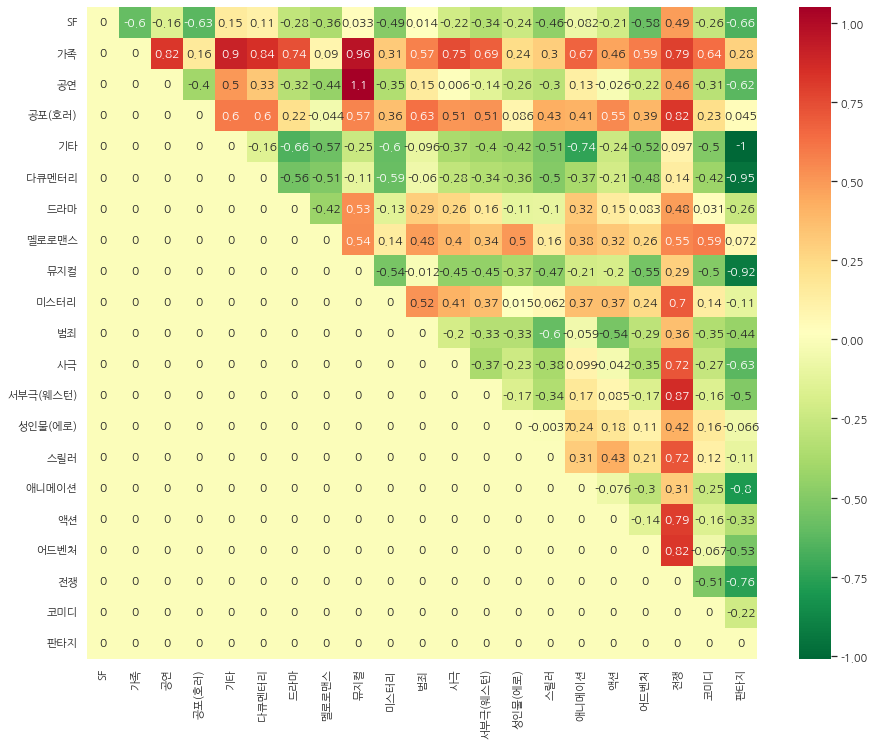

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 12))  #

ax = sns.heatmap(
    matrix,
    xticklabels=genre_name,
    yticklabels=genre_name,
    annot=True,
    cmap='RdYlGn_r'
)
plt.show()


비교 대상이 조금 달라지고 기존에 높았던 스코어들이 더욱 높아짐

| 장르쌍         | 중복 제거 전 WEAT | 중복 제거 후 WEAT | 변화 방향  |
| ----------- | ------------ | ------------ | ------ |
| 기타 – 판타지    | -0.8755 (가정) | -1.0099      | 더 뚜렷해짐 |
| 다큐멘터리 – 판타지 | -0.91 (가정)   | -0.9549      | 소폭 하락  |
| 가족 – 뮤지컬    | 0.8193 (가정)  | 0.9640       | 상승     |


+ 장르별 특이성이 더 잘 반영된 것 같음
+ WEAT score는 극단값 방향으로 더 강하게 이동하는 경향 있음 (편향 더 선명해짐)

### 판타지 키워드 단어들을 직접 예술영화와 일반영화의 유사도비교

In [152]:
fantasy_keywords = ["요괴", "존재", "마법", "공주", "순영", "가영", "현실", "이상", "모습", "집신", "기억", "유령", "단편", "순간", "차사"]
art_keywords = ["자신", "시작", "사랑", "사람", "친구", "영화", "남자", "여자", "가족", "이야기", "마을", "마음", "사건", "세상", "아버지", "아이", "엄마", "시간", "세계", "아들", "소녀", "아내", "사이", "영화제", "감독", "서로", "남편", "비밀", "여행", "인생", "학교", "발견", "순간", "사실", "음악", "생활", "아빠", "마지막", "행복", "기억", "모습", "죽음", "소년", "이상", "도시", "단편", "사고", "결혼", "한편", "위기", "생각", "관계", "성공", "전쟁", "일상", "경찰", "최고", "과거", "인간", "현실", "상황", "결심", "운명", "여인", "하루", "이름", "이후", "준비", "위험", "동안", "감정", "충격", "살인", "부모", "존재", "연인", "어머니", "희망", "특별", "결국", "청년", "국제", "시절", "동생", "작가", "작품", "여성", "상처", "모두", "사회", "목숨", "할머니", "진실", "매력", "계획", "제안", "만남", "이유", "자리", "배우"
]

# 유사도 계산 및 출력
for f in fantasy_keywords:
    for a in art_keywords:
        if f in model.wv and a in model.wv:
            sim = model.wv.similarity(f, a)
            print(f"{f} - {a}: {sim:.4f}")


요괴 - 자신: 0.3144
요괴 - 시작: 0.4072
요괴 - 사랑: 0.1976
요괴 - 사람: 0.3958
요괴 - 친구: 0.2138
요괴 - 영화: 0.0240
요괴 - 남자: 0.1641
요괴 - 여자: 0.0864
요괴 - 가족: 0.3248
요괴 - 이야기: 0.1499
요괴 - 마을: 0.4080
요괴 - 마음: 0.1633
요괴 - 사건: 0.1599
요괴 - 세상: 0.6249
요괴 - 아버지: 0.2626
요괴 - 아이: 0.3062
요괴 - 엄마: 0.2566
요괴 - 시간: 0.2303
요괴 - 세계: 0.4987
요괴 - 아들: 0.2924
요괴 - 소녀: 0.3572
요괴 - 아내: 0.1799
요괴 - 사이: 0.2751
요괴 - 영화제: 0.2135
요괴 - 감독: -0.0053
요괴 - 서로: 0.2789
요괴 - 남편: 0.0913
요괴 - 비밀: 0.5216
요괴 - 여행: 0.2551
요괴 - 인생: 0.2007
요괴 - 학교: 0.0850
요괴 - 발견: 0.4425
요괴 - 순간: 0.4455
요괴 - 사실: 0.3503
요괴 - 음악: 0.1410
요괴 - 생활: 0.0687
요괴 - 아빠: 0.3733
요괴 - 마지막: 0.4516
요괴 - 행복: 0.2772
요괴 - 기억: 0.2332
요괴 - 모습: 0.2382
요괴 - 죽음: 0.4869
요괴 - 소년: 0.4368
요괴 - 이상: 0.4253
요괴 - 도시: 0.4995
요괴 - 단편: 0.1663
요괴 - 사고: 0.3320
요괴 - 결혼: 0.0572
요괴 - 한편: 0.4771
요괴 - 위기: 0.6534
요괴 - 생각: 0.2592
요괴 - 관계: 0.1150
요괴 - 성공: 0.2424
요괴 - 전쟁: 0.5975
요괴 - 일상: 0.0914
요괴 - 경찰: 0.2654
요괴 - 최고: 0.3298
요괴 - 과거: 0.2820
요괴 - 인간: 0.6715
요괴 - 현실: 0.2615
요괴 - 상황: 0.3580
요괴 - 결심: 0.4077
요괴 

In [151]:
fantasy_keywords = ["요괴", "존재", "마법", "공주", "순영", "가영", "현실", "이상", "모습", "집신", "기억", "유령", "단편", "순간", "차사"]
art_keywords = [
    "자신", "영화제", "사람", "시작", "영화", "친구", "국제", "남자", "사랑", "이야기", "여자", "사건", "남편", "가족", "아이",
    "아버지", "세계", "시간", "단편", "마을", "엄마", "마음", "아들", "모습", "관계", "감독", "생각", "작품", "사이", "세상", 
    "발견", "아내", "여성", "소녀", "사실", "애니메이션", "이상", "인간", "생활", "죽음", "결혼", "비밀", "상황", "학교", 
    "기억", "도시", "여행", "소년", "한편", "순간", "서로", "과거", "경찰", "동안", "마지막", "현실", "전쟁", "존재", "일상", 
    "주인공", "사회", "사고", "어머니", "연출", "인생", "섹스", "다큐멘터리", "부문", "살인", "위험", "행복", "최고", "의도", 
    "위기", "동생", "조직", "부부", "회사", "계획", "이후", "시절", "성공", "아빠", "결국", "문제", "하루", "음악", "부모", 
    "운명", "감정", "경쟁", "사진", "결심", "할머니", "준비", "거대", "동료", "정체", "소리", "과정"
]

# 유사도 계산 및 출력
for f in fantasy_keywords:
    for a in art_keywords:
        if f in model.wv and a in model.wv:
            sim = model.wv.similarity(f, a)
            print(f"{f} - {a}: {sim:.4f}")


요괴 - 자신: 0.3144
요괴 - 영화제: 0.2135
요괴 - 사람: 0.3958
요괴 - 시작: 0.4072
요괴 - 영화: 0.0240
요괴 - 친구: 0.2138
요괴 - 국제: 0.3246
요괴 - 남자: 0.1641
요괴 - 사랑: 0.1976
요괴 - 이야기: 0.1499
요괴 - 여자: 0.0864
요괴 - 사건: 0.1599
요괴 - 남편: 0.0913
요괴 - 가족: 0.3248
요괴 - 아이: 0.3062
요괴 - 아버지: 0.2626
요괴 - 세계: 0.4987
요괴 - 시간: 0.2303
요괴 - 단편: 0.1663
요괴 - 마을: 0.4080
요괴 - 엄마: 0.2566
요괴 - 마음: 0.1633
요괴 - 아들: 0.2924
요괴 - 모습: 0.2382
요괴 - 관계: 0.1150
요괴 - 감독: -0.0053
요괴 - 생각: 0.2592
요괴 - 작품: 0.0719
요괴 - 사이: 0.2751
요괴 - 세상: 0.6249
요괴 - 발견: 0.4425
요괴 - 아내: 0.1799
요괴 - 여성: -0.0777
요괴 - 소녀: 0.3572
요괴 - 사실: 0.3503
요괴 - 애니메이션: 0.2705
요괴 - 이상: 0.4253
요괴 - 인간: 0.6715
요괴 - 생활: 0.0687
요괴 - 죽음: 0.4869
요괴 - 결혼: 0.0572
요괴 - 비밀: 0.5216
요괴 - 상황: 0.3580
요괴 - 학교: 0.0850
요괴 - 기억: 0.2332
요괴 - 도시: 0.4995
요괴 - 여행: 0.2551
요괴 - 소년: 0.4368
요괴 - 한편: 0.4771
요괴 - 순간: 0.4455
요괴 - 서로: 0.2789
요괴 - 과거: 0.2820
요괴 - 경찰: 0.2654
요괴 - 동안: 0.2697
요괴 - 마지막: 0.4516
요괴 - 현실: 0.2615
요괴 - 전쟁: 0.5975
요괴 - 존재: 0.6856
요괴 - 일상: 0.0914
요괴 - 주인공: 0.1560
요괴 - 사회: 0.1769
요괴 - 사고: 0.332

# 회고
판타지와 공포와 같은 장르들이 예술영화와 가깝다고 판단하여 단어의 중복을 제거하는데 공을 들임
단어들을 제거하고 각 장르를 대표한다고 판단되는 단어들이 잘 추출되었다고 판단되었을 때
다시 편향을 확인한 결과 편향이 더욱 짙어진 것을 확인할 수 있었다.
그래서 word2vec 코사인유사도를 확인해보니 
대체적으로 예술영화의 키워드들이 일반영화보다 코사인 유사도가 높은 것을 확인할 수 있었다.